In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('laptops_10.csv',encoding="latin-1")
df

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4GB,Intel HD Graphics 520,Windows 10,1.80,638.00,Intel,128,SSD
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16GB,Intel HD Graphics 520,Windows 10,1.30,1499.00,Intel,512,SSD
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2GB,Intel HD Graphics,Windows 10,1.50,229.00,Intel,64,FlashStorage
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6GB,AMD Radeon R5 M330,Windows 10,2.19,764.00,Intel,1024,HDD


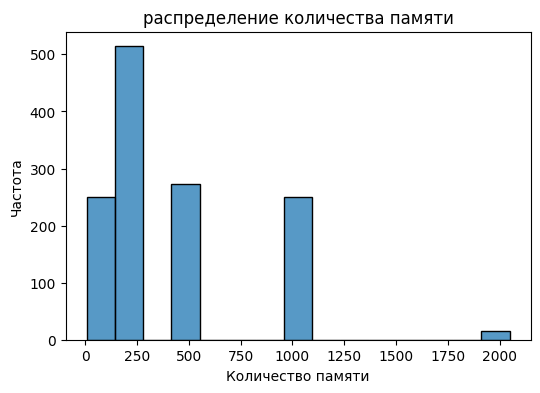

In [6]:
plt.figure(figsize=(6, 4))

sns.histplot(df['Memory_Amount'], bins=15)

plt.title('распределение количества памяти')
plt.xlabel('Количество памяти')
plt.ylabel('Частота');

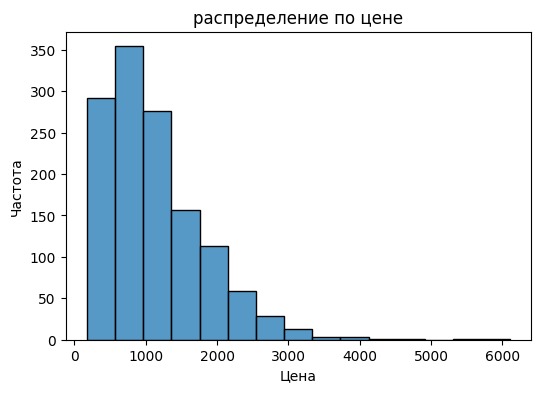

In [8]:
plt.figure(figsize=(6, 4))

sns.histplot(df['Price_euros'], bins=15)

plt.title('распределение по цене')
plt.xlabel('Цена')
plt.ylabel('Частота');

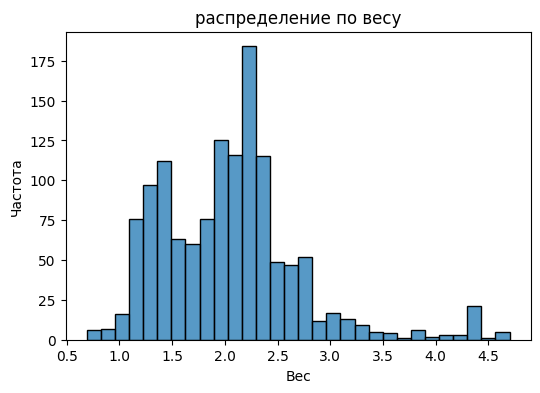

In [11]:
plt.figure(figsize=(6, 4))

sns.histplot(df['Weight'], bins=30)

plt.title('распределение по весу')
plt.xlabel('Вес')
plt.ylabel('Частота');

## 2.

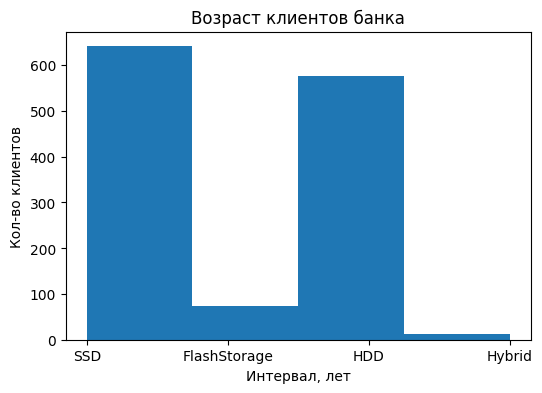

In [32]:
plt.figure(figsize=(6, 4))

plt.hist(df['Memory_Type'], bins=4)

plt.title('Возраст клиентов банка')
plt.xlabel('Интервал, лет')
plt.ylabel('Кол-во клиентов');

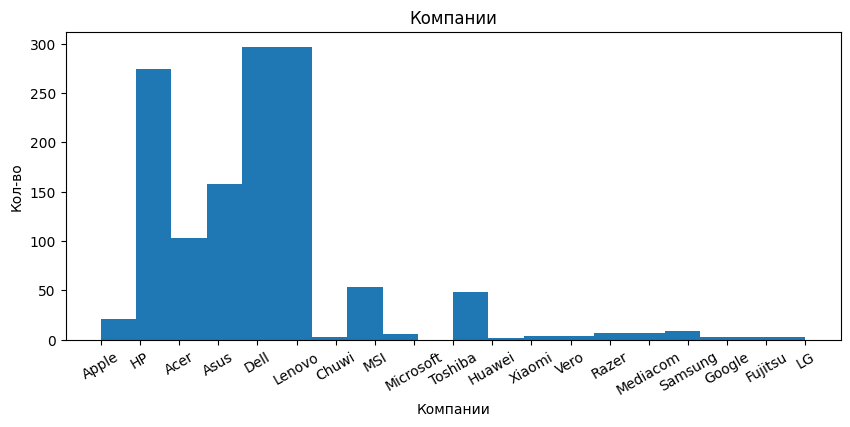

In [33]:
plt.figure(figsize=(10, 4))

#sns.barplot(x=df['Company'], y=df.index)
plt.hist(df['Company'], bins=20)
plt.title('Компании')
plt.xlabel('Компании')
plt.ylabel('Кол-во')
plt.xticks(rotation=30);



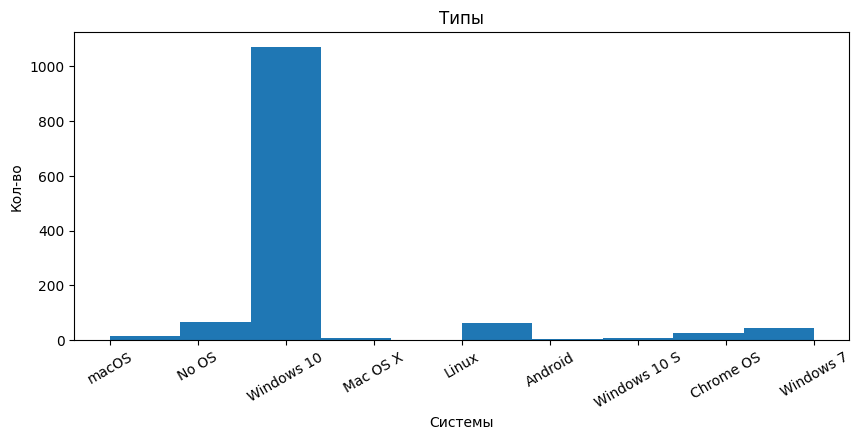

In [39]:
plt.figure(figsize=(10, 4))

#sns.barplot(x=df['OpSys'], y=df.index)
plt.hist(df['OpSys'], bins=10)
plt.title('Типы')
plt.xlabel('Системы')
plt.ylabel('Кол-во')
plt.xticks(rotation=30);

In [36]:
vc = df['Cpu_Company'].value_counts()

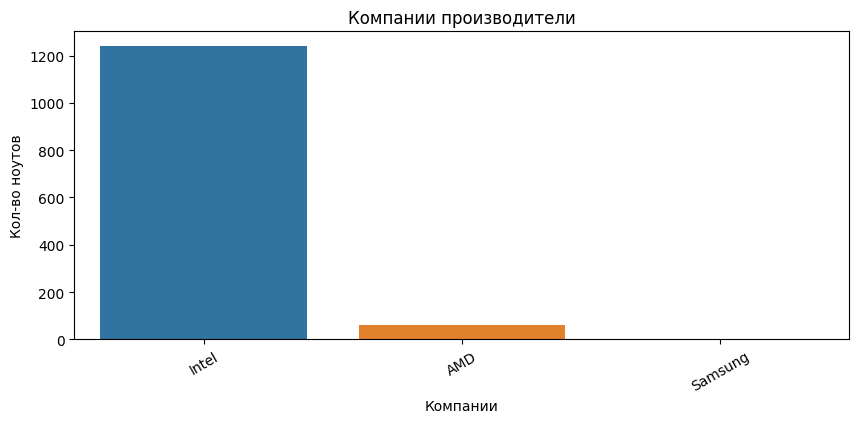

In [37]:
plt.figure(figsize=(10, 4))

#plt.bar(df['Cpu_Company'], df.index)
sns.barplot(x=vc.index, y=vc.values)
plt.xticks(rotation=30);
plt.title('Компании производители')
plt.xlabel('Компании')
plt.ylabel('Кол-во ноутов');

## 3

In [45]:
data = pd.crosstab(df['Company'], df['Cpu_Company']).reset_index().sort_values(by='Intel', ascending=False)
data.drop(columns = ['Samsung'], inplace = True)
data.head()

Cpu_Company,Company,AMD,Intel
4,Dell,0,297
10,Lenovo,16,281
7,HP,25,249
2,Asus,11,147
0,Acer,10,93


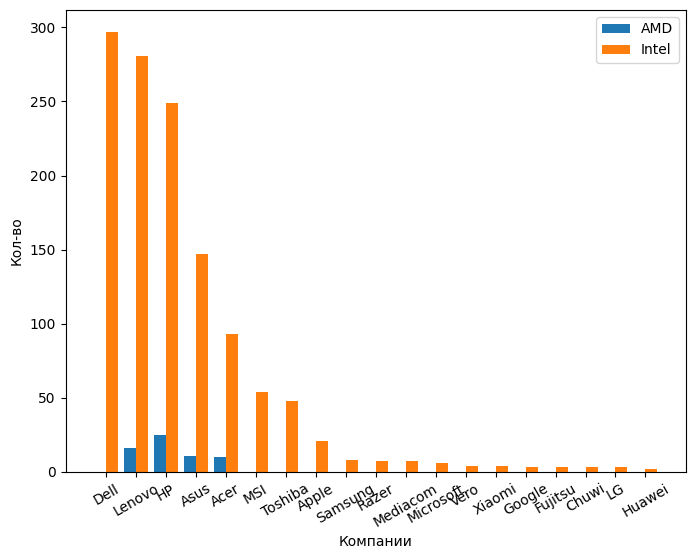

In [48]:
plt.figure(figsize=(8, 6))

# определяем кол-во делений
n_ticks = np.arange(len(data['Company']))

# определяем сдвиг
offset = 0.2

# определяем ширину столбцов
w = 0.4

# добавляем сдвиг к кол-ву делений
plt.bar(n_ticks - offset, data['AMD'], width=w)
plt.bar(n_ticks + offset, data['Intel'], width=w)

plt.title('')
plt.xlabel('Компании')
plt.ylabel('Кол-во')
plt.legend(['AMD','Intel'])
plt.xticks(n_ticks, data['Company'], rotation = 30);  # добавляем метки делений

In [50]:
data = pd.crosstab(df['Company'], df['Cpu_Company'], normalize = 'index').reset_index().sort_values(by='Intel', ascending=False)
data.drop(columns = ['Samsung'], inplace = True)
data


Cpu_Company,Company,AMD,Intel
9,LG,0.000000,1.000000
1,Apple,0.000000,1.000000
17,Vero,0.000000,1.000000
16,Toshiba,0.000000,1.000000
14,Razer,0.000000,1.000000
13,Microsoft,0.000000,1.000000
12,Mediacom,0.000000,1.000000
11,MSI,0.000000,1.000000
18,Xiaomi,0.000000,1.000000
8,Huawei,0.000000,1.000000


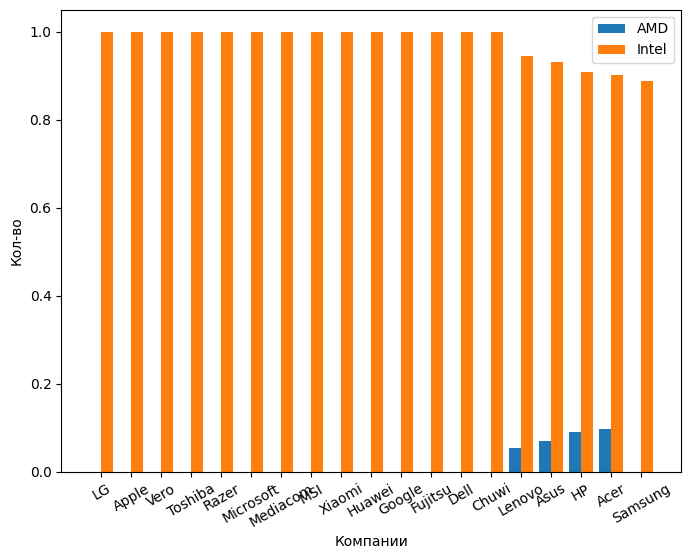

In [51]:
plt.figure(figsize=(8, 6))

# определяем кол-во делений
n_ticks = np.arange(len(data['Company']))

# определяем сдвиг
offset = 0.2

# определяем ширину столбцов
w = 0.4

# добавляем сдвиг к кол-ву делений
plt.bar(n_ticks - offset, data['AMD'], width=w)
plt.bar(n_ticks + offset, data['Intel'], width=w)

plt.title('')
plt.xlabel('Компании')
plt.ylabel('Кол-во')
plt.legend(['AMD','Intel'])
plt.xticks(n_ticks, data['Company'], rotation = 30); 

## 4

Text(0, 0.5, 'Цена')

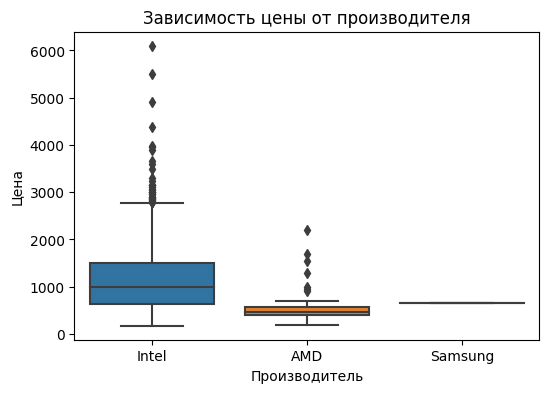

In [57]:
plt.figure(figsize=(6, 4))

sns.boxplot(y=df['Price_euros'],x=df['Cpu_Company'])

plt.title('Зависимость цены от производителя')
plt.xlabel('Производитель')
plt.ylabel('Цена')


Text(0, 0.5, 'Цена')

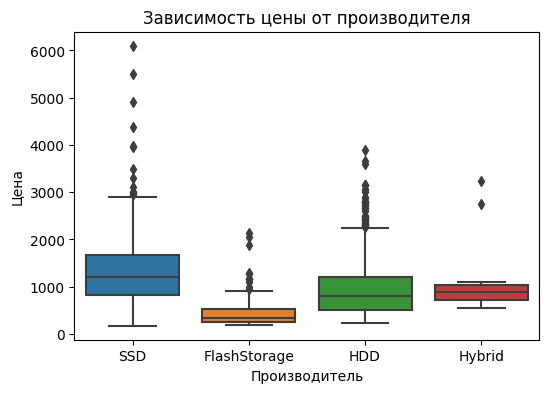

In [61]:
plt.figure(figsize=(6, 4))

sns.boxplot(y=df['Price_euros'],x=df['Memory_Type'])

plt.title('Зависимость цены от типа памяти')
plt.xlabel('Тип памяти')
plt.ylabel('Цена')

Text(0, 0.5, 'Цена')

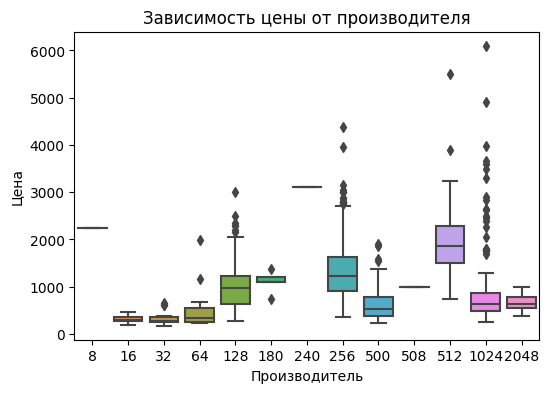

In [62]:
plt.figure(figsize=(6, 4))

sns.boxplot(y=df['Price_euros'],x=df['Memory_Amount'])

plt.title('Зависимость цены от количества памяти')
plt.xlabel('Производитель')
plt.ylabel('Размер памяти')

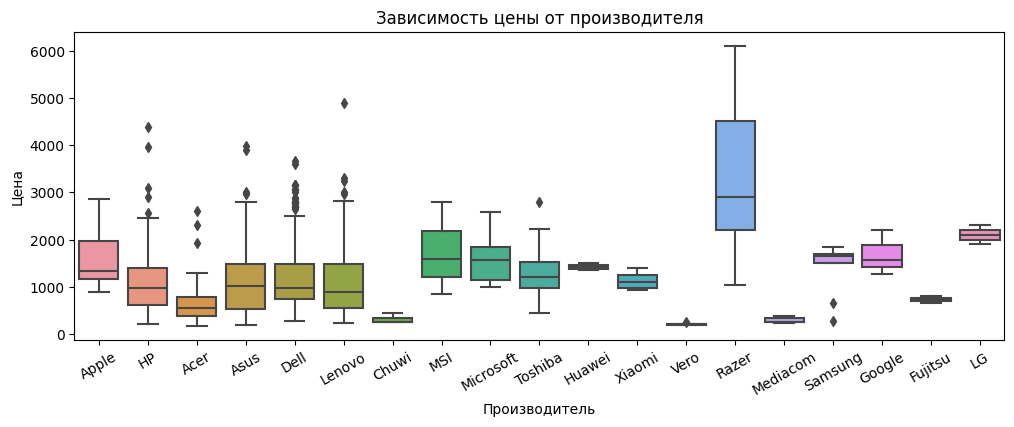

In [65]:
plt.figure(figsize=(12, 4))

sns.boxplot(y=df['Price_euros'],x=df['Company'])

plt.title('Зависимость цены от производителя')
plt.xlabel('Производитель')
plt.ylabel('Цена')
plt.xticks(rotation=30);

C:\Users\Elena\AppData\Local\Temp\ipykernel_14032\4255325961.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


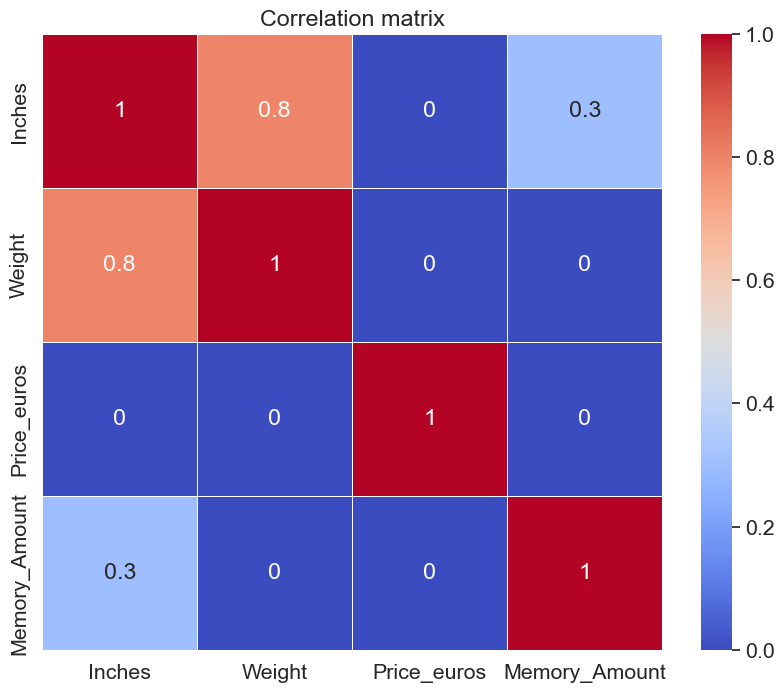

In [67]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

plt.figure(figsize=(10, 8))

sns.set(font_scale=1.4)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix');

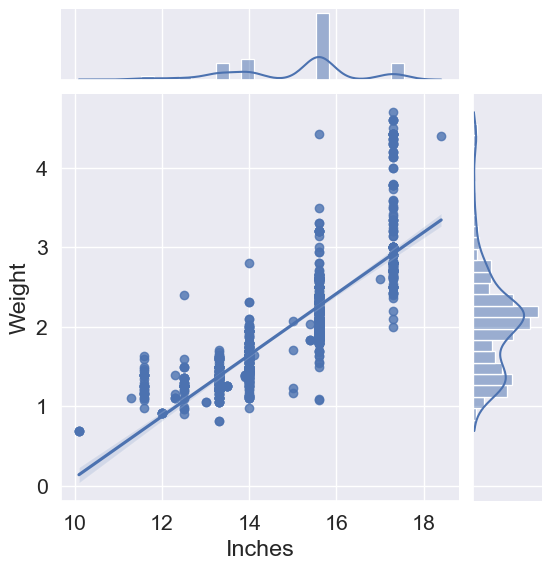

In [68]:
sns.jointplot(x=df['Inches'], y=df['Weight'], kind='reg');

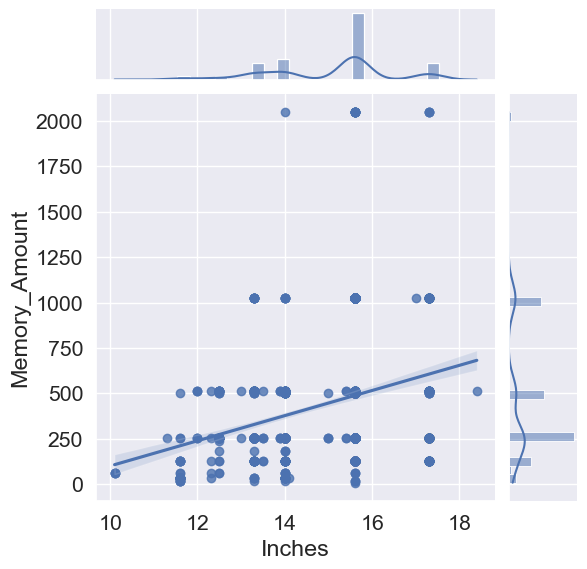

In [69]:
sns.jointplot(x=df['Inches'], y=df['Memory_Amount'], kind='reg');